# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




In [5]:
# Load the cleaned King County housing data
file_path = '/Users/muhammaddildar/Desktop/cleaned_kc_house_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [9]:
df_clustering = df.drop(columns=[ 'date', 'zipcode', 'lat', 'long'])
df_clustering.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,was_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0


In [11]:
df_clustering.isnull().sum()


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
was_renovated    0
dtype: int64

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

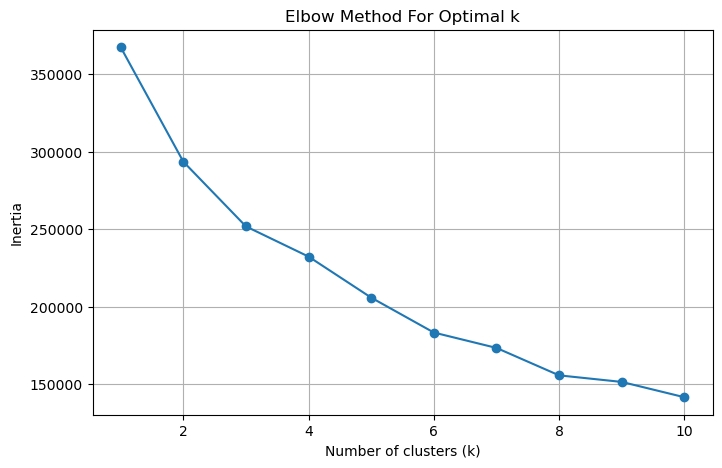

In [15]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

### Choosing the Optimal Number of Clusters (k)

To determine the optimal number of clusters for the k-means algorithm, I used the Elbow Method. The elbow plot shows the inertia values for cluster counts ranging from 1 to 10.

**Inertia** represents the sum of squared distances between each data point and its assigned cluster’s centroid. As the number of clusters increases, the inertia decreases, since the points are closer to the centroids.

From the graph, there is a noticeable "elbow" at **k = 3**, where the rate of decrease in inertia slows significantly. This suggests that adding more clusters beyond this point provides little benefit.

➡️ Based on this, I selected **3 clusters** as the optimal number for k-means clustering.


In [18]:
# Run k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to your original dataframe
df['cluster'] = kmeans.labels_


### Running k-Means Clustering

Using the optimal number of clusters (**k = 3**) identified from the Elbow Method, I applied the k-means algorithm to the standardized dataset. A new column named **"cluster"** was added to the dataframe, assigning each row to one of the three clusters.

These clusters will now be used to create visualizations and analyze patterns in the data.


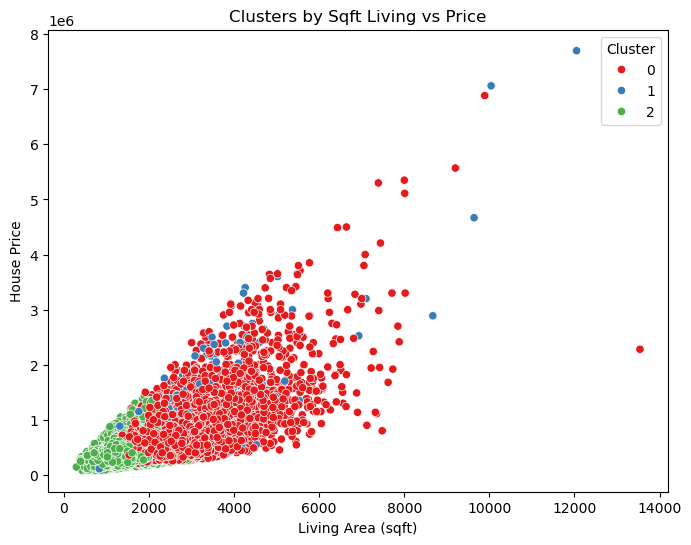

In [21]:
# Scatterplot: Price vs Sqft Living, colored by cluster
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='cluster', palette='Set1')
plt.title('Clusters by Sqft Living vs Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('House Price')
plt.legend(title='Cluster')
plt.show()


### Cluster Visualization: Price vs Sqft Living

This scatterplot shows the distribution of houses based on their **living area** and **price**, colored by their assigned cluster. The clustering reveals how house prices tend to rise with increased square footage, but distinct groupings exist, possibly influenced by other factors like location or house condition.


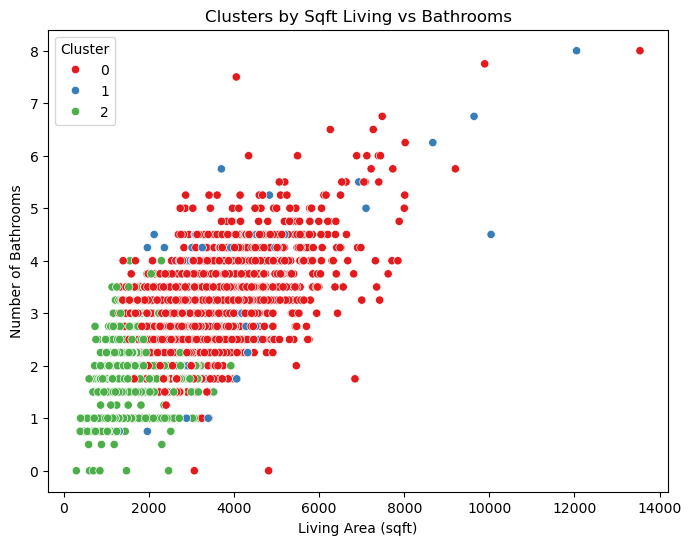

In [24]:
# Scatterplot: Bathrooms vs Sqft Living, colored by cluster
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sqft_living', y='bathrooms', hue='cluster', palette='Set1')
plt.title('Clusters by Sqft Living vs Bathrooms')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Number of Bathrooms')
plt.legend(title='Cluster')
plt.show()


### Cluster Visualization: Bathrooms vs Sqft Living

This scatterplot explores the relationship between living area and number of bathrooms across clusters. As expected, homes with more living space tend to have more bathrooms. The clusters help reveal how different property types (e.g., smaller homes vs. luxury homes) group together, reinforcing the logic behind the cluster assignments.


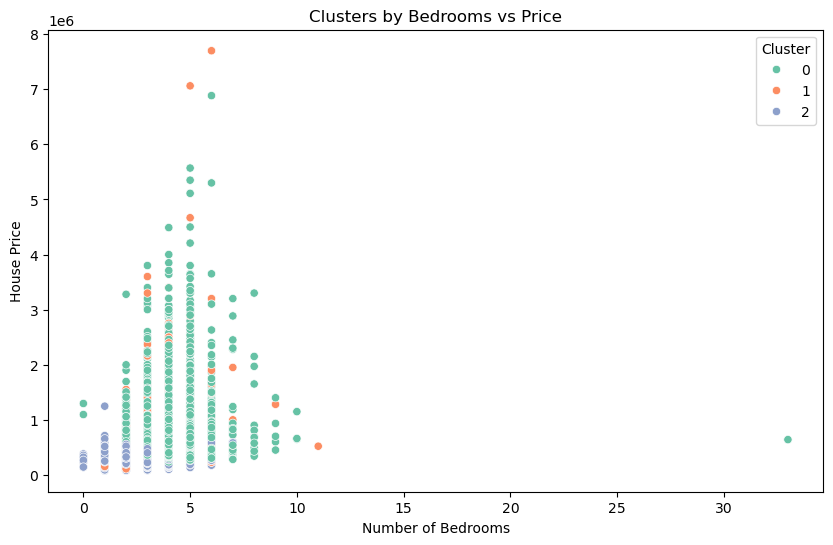

In [31]:
# Scatterplot: Bedrooms vs Price
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bedrooms', y='price', hue='cluster', palette='Set2')
plt.title('Clusters by Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.legend(title='Cluster')
plt.show()


### Cluster Visualization: Price vs Bathrooms

This scatterplot illustrates the relationship between the number of bathrooms and house prices, segmented by cluster. As the number of bathrooms increases, house prices also tend to rise, especially in Cluster 0. However, clusters show distinct grouping patterns, suggesting that bathroom count plays a role in price variation alongside other factors like square footage and location.


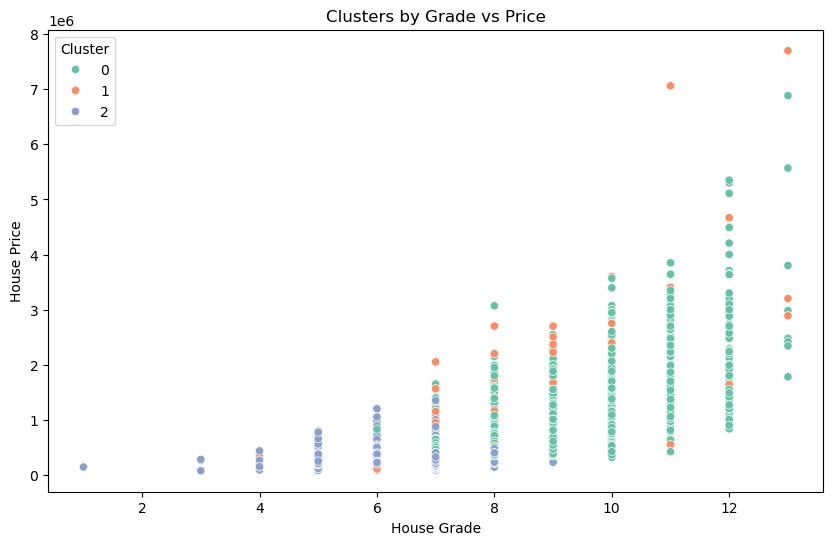

In [34]:
# Scatterplot: Grade vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='grade', y='price', hue='cluster', palette='Set2')
plt.title('Clusters by Grade vs Price')
plt.xlabel('House Grade')
plt.ylabel('House Price')
plt.legend(title='Cluster')
plt.show()


### Cluster Visualization: Price vs Grade

This scatterplot reveals how house prices vary by construction quality (grade), colored by cluster. Generally, higher-grade homes are associated with higher prices, as reflected in Cluster 0. The clusters highlight groupings where homes of similar grades tend to fall within certain price ranges, suggesting that grade is a strong indicator of home value.


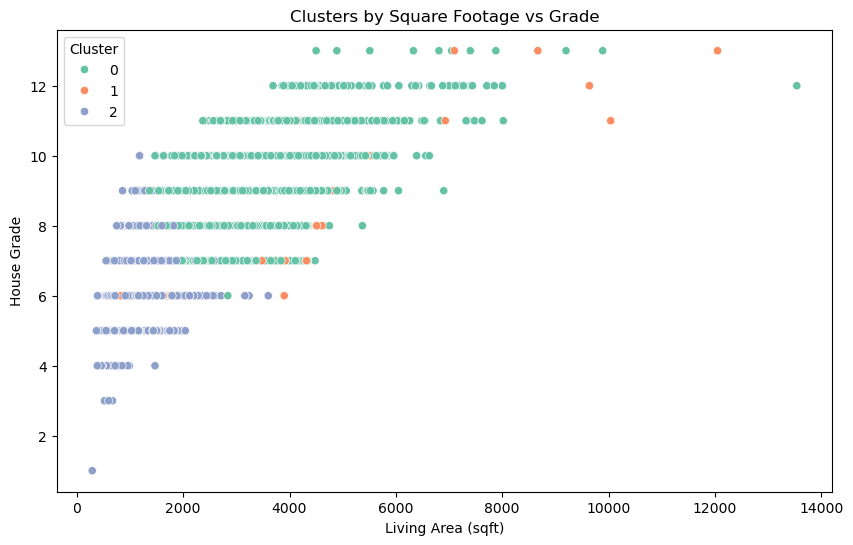

In [37]:
# Scatterplot: Sqft Living vs Grade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft_living', y='grade', hue='cluster', palette='Set2')
plt.title('Clusters by Square Footage vs Grade')
plt.xlabel('Living Area (sqft)')
plt.ylabel('House Grade')
plt.legend(title='Cluster')
plt.show()


### Cluster Visualization: Sqft Living vs Grade

This scatterplot examines the relationship between a home’s living area and its construction grade. The clusters show distinct patterns—homes with larger living areas tend to have higher grades, especially in Cluster 0. Smaller and lower-grade homes are grouped into Cluster 2, indicating a correlation between home size and construction quality.


### 📊 Descriptive Statistics by Cluster

To understand the characteristics of each cluster, we used the `groupby()` function to calculate the mean of all numeric variables by cluster.

These statistics help us compare variables like price, square footage, number of bedrooms/bathrooms, and more across the different groups. Here’s a summary of what the data shows:

- **Red Cluster**: Highest average values across most variables, especially `price` and `sqft_living`. This cluster likely represents luxury properties.
- **Green Cluster**: Moderate values, particularly in `sqft_living` and `price`. Represents larger homes with more average pricing.
- **Orange Cluster**: Homes with lower square footage and mid-level pricing. Possibly standard family homes.
- **Blue Cluster**: Lowest averages across nearly all variables. Likely smaller or older homes in less expensive areas.

These insights can guide stakeholders in identifying target segments, pricing strategies, and investment opportunities.


In [50]:
# Replace 'cluster' with the name of the cluster column
cluster_stats = df.groupby('cluster').mean(numeric_only=True)
display(cluster_stats)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
cluster,,,,,,,,,,,,,,,,,,,,
0,757326.978566,3.890267,2.758055,2923.638312,23279.126719,1.886627,0.013076,0.410084,3.239687,8.727689,2614.021704,309.616608,1991.107981,0.000000,98061.586951,47.561374,-122.155406,2594.978161,18510.174036,0.0
1,760379.029540,3.452954,2.298961,2320.693654,16633.631291,1.510394,0.045952,0.613786,3.223195,7.735230,1879.728665,440.964989,1939.527352,1995.827133,98094.320569,47.579405,-122.259721,1977.565646,13797.580963,1.0
2,403590.621791,3.075070,1.742772,1592.064604,10437.405994,1.274076,0.001807,0.110007,3.517054,7.053385,1320.954973,271.109630,1961.943152,0.000000,98085.946239,47.557982,-122.243412,1647.339508,9490.638657,0.0


In [44]:
df.select_dtypes(include=['float64', 'int64']).groupby(df['cluster']).mean().round(2)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
cluster,,,,,,,,,,,,,,,,,,,,
0,757326.98,3.89,2.76,2923.64,23279.13,1.89,0.01,0.41,3.24,8.73,2614.02,309.62,1991.11,0.00,98061.59,47.56,-122.16,2594.98,18510.17,0.0
1,760379.03,3.45,2.30,2320.69,16633.63,1.51,0.05,0.61,3.22,7.74,1879.73,440.96,1939.53,1995.83,98094.32,47.58,-122.26,1977.57,13797.58,1.0
2,403590.62,3.08,1.74,1592.06,10437.41,1.27,0.00,0.11,3.52,7.05,1320.95,271.11,1961.94,0.00,98085.95,47.56,-122.24,1647.34,9490.64,0.0


### 📈 Application of Clustering Insights

The results of the k-means clustering analysis can support several important steps in the data analytics pipeline:

- **Targeted Marketing Strategies**: By identifying distinct groups based on home size, price, and quality, real estate agencies or developers can tailor campaigns to specific buyer segments — such as luxury buyers vs. budget-conscious buyers.

- **Price Optimization**: Understanding which features (e.g., square footage, grade, bathrooms) correlate with higher or lower price clusters allows sellers to make informed decisions when pricing homes.

- **Feature Engineering for Predictive Models**: The `cluster` label can be added as a new feature in future predictive models (e.g., predicting sale price or time on market), helping to capture complex relationships in the data.

- **Outlier Detection**: Homes that do not align with their cluster’s characteristics could be flagged for deeper inspection as potential outliers, errors, or unique listings.

- **Customer Segmentation**: These clusters can also help businesses or agencies categorize clients based on their preferences (e.g., clients who typically buy smaller, mid-range, or luxury homes).

These applications can enhance decision-making, model accuracy, and business strategy in the real estate domain.


In [55]:
df.to_csv('/Users/muhammaddildar/Desktop/clustered_kc_housing_data.csv', index=False)